Business understanding

Data understanding

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import scipy.stats as st
import seaborn as sns
import math
import alteredAwpyFunctions as aaf

In [2]:
#importing data
dir_path = "JSON"
games = []
for file in os.listdir(dir_path):
    if file.endswith(".json"):
        game = json.load(open(dir_path+"/"+file))
        games.append(game) 

In [ ]:
#generate list of unique maps in pool
maps = []
for game in games:
    if game['mapName'] not in maps:
        maps.append(game['mapName'])

#init dict's of maps
map_dict_mouz = {}
map_dict_enemy = {}
avg_kills_mouz = {}
avg_kills_enemy = {}
stdef_map_dict_mouz = {}
stdef_map_dict_enemy = {}
conf_rate_kills = {}
win_dict = {}
loss_dict = {}
kill_dif = {}
win_dif = {}
stdef_loss_dict = {}
stdef_win_dict = {}
conf_rate_wins = {}
kill_win_dict_mouz = {}
bomb_win_dict_mouz = {}
kill_win_dict_enemy = {}
bomb_win_dict_enemy = {}
i=0
for k in maps:
    map_dict_mouz[maps[i]] = []
    map_dict_enemy[maps[i]] = []
    avg_kills_mouz[maps[i]] = []
    avg_kills_enemy[maps[i]] = []
    stdef_map_dict_mouz[maps[i]] = []
    stdef_map_dict_enemy[maps[i]] = []
    conf_rate_kills[maps[i]] = []
    win_dict[maps[i]] = []
    loss_dict[maps[i]] = []
    kill_dif[maps[i]] = []
    win_dif[maps[i]] = []
    stdef_loss_dict[maps[i]] = []
    stdef_win_dict[maps[i]] = []
    conf_rate_wins[maps[i]] = []
    kill_win_dict_mouz[maps[i]] = 0
    bomb_win_dict_mouz[maps[i]] = 0
    kill_win_dict_enemy[maps[i]] = 0
    bomb_win_dict_enemy[maps[i]] = 0
    i += 1

In [ ]:
#fill dict's with kills per round
for game in games:
    for gameround in game['gameRounds']:
        number_of_kills_mouz = 0
        number_of_kills_enemy = 0
        for kill in gameround['kills']:
            if kill['attackerTeam'] == "MOUZ":
                number_of_kills_mouz += 1
            if kill['attackerTeam'] != "MOUZ":
                number_of_kills_enemy += 1 
        map_dict_mouz[game['mapName']].append(number_of_kills_mouz) 
        map_dict_enemy[game['mapName']].append(number_of_kills_enemy)

    #get SD and n
i = 0
for k in map_dict_mouz:
    stdef_map_dict_mouz[maps[i]].append(np.mean(map_dict_mouz[maps[i]]))
    stdef_map_dict_mouz[maps[i]].append(np.std(map_dict_mouz[maps[i]]))
    stdef_map_dict_mouz[maps[i]].append(len(map_dict_mouz[maps[i]]))
    stdef_map_dict_enemy[maps[i]].append(np.mean(map_dict_enemy[maps[i]]))
    stdef_map_dict_enemy[maps[i]].append(np.std(map_dict_enemy[maps[i]]))
    stdef_map_dict_enemy[maps[i]].append(len(map_dict_enemy[maps[i]]))
    i+=1

#get SE(diff)
i = 0
for k in stdef_map_dict_mouz:
    conf_rate_kills[maps[i]].append(math.sqrt((pow(stdef_map_dict_mouz.get(maps[i])[1], 2)/ stdef_map_dict_mouz.get(maps[i])[2]) + (pow(stdef_map_dict_enemy.get(maps[i])[1], 2)/ stdef_map_dict_enemy.get(maps[i])[2])))
    conf_rate_kills[maps[i]].append(stdef_map_dict_mouz.get(maps[i])[0]-stdef_map_dict_enemy.get(maps[i])[0])
    conf_rate_kills[maps[i]].append(conf_rate_kills.get(maps[i])[1]-1.96*conf_rate_kills.get(maps[i])[0])
    conf_rate_kills[maps[i]].append(conf_rate_kills.get(maps[i])[1]+1.96*conf_rate_kills.get(maps[i])[0])
    i += 1
conf_rate_kills

#calculate 95% conf 
i = 0
conf_low = []
conf_high = []
for k in conf_rate_kills:
    conf_high.append(conf_rate_kills[maps[i]][3])
    conf_low.append(conf_rate_kills[maps[i]][2])
    i += 1

#make dict containing diff in kills and the conf rate to plot
i = 0
for k in stdef_map_dict_mouz:
    kill_dif[maps[i]].append(stdef_map_dict_mouz[k][0]-stdef_map_dict_enemy[k][0])
    kill_dif[maps[i]].append(conf_low[i]) 
    kill_dif[maps[i]].append(conf_high[i]) 
    i += 1
#sort on highest to lowest dif in kills
kill_dif = dict(sorted(kill_dif.items(), key=lambda x:x[1], reverse=True))

keys = list(kill_dif.keys())
values = list(kill_dif.values())
low = []
high = []
dif = []

i = 0
for k in values:
    dif.append(values[i][0]) 
    i+=1
i = 0
for k in values:
    low.append(values[i][1])
    i+= 1
i = 0
for k in values:
    high.append(values[i][2])
    i+= 1

#plot barplot 
ax = sns.barplot(x=keys, y=dif, palette="blend:#7AB,#EDA")
ax.set(xlabel='Map Name', ylabel='Kill difference', title='Kill difference per map')
ax
#plot errorbars
i = 0
for k in range(0, len(kill_dif)):
    plt.plot([i,i], [low[i], high[i]], color = 'grey')
    i += 1

In [ ]:
#fill dict's with mouz and enemy wins per map
for game in games:
    number_of_winns = 0
    number_of_losses = 0
    for gameround in game['gameRounds']:
        if gameround['winningTeam'] == "MOUZ":
            number_of_winns += 1
        else:
            number_of_losses += 1
         
    win_dict[game['mapName']].append(number_of_winns) 
    loss_dict[game['mapName']].append(number_of_losses)

#statistics
i = 0
for k in map_dict_mouz:
    stdef_win_dict[maps[i]].append(np.mean(win_dict[maps[i]]))
    stdef_win_dict[maps[i]].append(np.std(win_dict[maps[i]]))
    stdef_win_dict[maps[i]].append(len(win_dict[maps[i]]))
    stdef_loss_dict[maps[i]].append(np.mean(loss_dict[maps[i]]))
    stdef_loss_dict[maps[i]].append(np.std(loss_dict[maps[i]]))
    stdef_loss_dict[maps[i]].append(len(loss_dict[maps[i]]))
    i+=1

i = 0
for k in stdef_loss_dict:
    conf_rate_wins[maps[i]].append(math.sqrt((pow(stdef_win_dict.get(maps[i])[1], 2)/ stdef_win_dict.get(maps[i])[2]) + (pow(stdef_loss_dict.get(maps[i])[1], 2)/ stdef_loss_dict.get(maps[i])[2])))
    conf_rate_wins[maps[i]].append(stdef_win_dict.get(maps[i])[0]-stdef_loss_dict.get(maps[i])[0])
    conf_rate_wins[maps[i]].append(conf_rate_wins.get(maps[i])[1]-1.96*conf_rate_wins.get(maps[i])[0])
    conf_rate_wins[maps[i]].append(conf_rate_wins.get(maps[i])[1]+1.96*conf_rate_wins.get(maps[i])[0])
    i += 1

#calculate 95% conf 
i = 0
conf_low = []
conf_high = []
for k in conf_rate_kills:
    conf_high.append(conf_rate_wins[maps[i]][3])
    conf_low.append(conf_rate_wins[maps[i]][2])
    i += 1

#make dict containing diff in kills and the conf rate to plot
i = 0
for k in stdef_win_dict:
    win_dif[maps[i]].append(stdef_win_dict[k][0]-stdef_loss_dict[k][0])
    win_dif[maps[i]].append(conf_low[i]) 
    win_dif[maps[i]].append(conf_high[i]) 
    i += 1
#sort on highest to lowest dif in kills
win_dif = dict(sorted(win_dif.items(), key=lambda x:x[1], reverse=True))

keys = list(win_dif.keys())
values = list(win_dif.values())
low = []
high = []
dif = []

i = 0
for k in values:
    dif.append(values[i][0]) 
    i+=1
i = 0
for k in values:
    low.append(values[i][1])
    i+= 1
i = 0
for k in values:
    high.append(values[i][2])
    i+= 1

#plot barplot 
ax = sns.barplot(x=keys, y=dif, palette="blend:#7AB,#EDA")
ax.set(xlabel='Map Name', ylabel='Kill difference', title='Kill difference per map')
ax
#plot errorbars
i = 0
for k in range(0, len(win_dif)):
    plt.plot([i,i], [low[i], high[i]], color = 'grey')
    i += 1  

In [ ]:

stages = {"challenger_stage" : [], 
          "legends_stage" : [], 
          "champion_stage" : []}

for game in games:
    if (game['matchID'] == "mouz_vs_outsiders_inferno") or (game['matchID'] == "evil_geniuses_vs_mouz_mirage") or (game['matchID'] == "mouz_vs_fnatic_m1_vertigo") or (game['matchID'] == "mouz_vs_fnatic_m2_inferno") or (game['matchID'] == "mouz_vs_fnatic_m3_ancient"):
        stages["challenger_stage"].append(game)
    elif (game['matchID'] == "mouz_vs_liquid_inferno") or (game['matchID'] == "mouz_vs_big_mirage") or (game['matchID'] == "mouz_vs_vitality_mirage") or (game['matchID'] == "mouz_vs_outsiders_m1_overpass") or (game['matchID'] == "mouz_vs_outsiders_m2_inferno") or (game['matchID'] == "mouz_vs_ence_m1_ancient") or (game['matchID'] == "mouz_vs_ence_m2_nuke") or (game['matchID'] == "mouz_vs_ence_m3_mirage"):
        stages["legends_stage"].append(game)
    elif (game['matchID'] == "mouz_vs_cloud9_m1_inferno") or (game['matchID'] == "mouz_vs_cloud9_m2_overpass") or (game['matchID'] == "mouz_vs_cloud9_m3_ancient") or (game['matchID'] == "outsiders_vs_mouz_m1_ancient") or (game['matchID'] == "outsiders_vs_mouz_m2_overpass") or (game['matchID'] == "outsiders_vs_mouz_m3_inferno"):
        stages["champion_stage"].append(game)
    else:
        raise Exception("unexpected match in list")
for stage in stages:
    ct_wins = 0
    t_wins = 0
    ct_losses = 0
    t_losses = 0
    total = 0  
                   
    for game in stages[stage]:
        for gameround in game['gameRounds']:
            if gameround['ctTeam'] == "MOUZ":
                if gameround['winningSide'] == "CT":
                    ct_wins += 1
                    total += 1
                else:
                    ct_losses += 1
                    total += 1
            else:
                if gameround['winningSide'] == "T":
                    t_wins += 1
                    total += 1
                else:
                    t_losses += 1
                    total += 1
    ax = []
    colors = ['grey', 'grey', 'b', 'b', 'r', 'r']
    name = ['Wins', 'Loss', 'WinAsT', 'LossAsT', 'WinAsCT', 'LossAsCT']
    val = [(ct_wins+t_wins), (ct_losses+t_losses), t_wins, t_losses, ct_wins, ct_losses]
    ax.append(sns.barplot(x=name, y=val, palette = colors))
    plt.title(stage)
    plt.xlabel('Wins/Loses as')
    plt.ylabel('Rounds')
    plt.show()     

In [ ]:
#make list of unique weapons
weapons = []
for game in games:
    for gameround in game['gameRounds']:
        j = 0
        for fire in gameround['weaponFires']:
            if fire['weapon'] not in weapons:
              weapons.append(fire['weapon'])  
            j += 1  
#make dict of weapons
weapon_dict = {}
weapon_count_dict = {}
i=0
for k in weapons:
    weapon_dict[weapons[i]] = 0
    weapon_count_dict[weapons[i]] = 0
    i += 1
#make dict with totla kills per weapon
for game in games:
    for gameround in game['gameRounds']:
        number_of_kills = 0
        j = 0
        for kill in gameround['kills']:
            if kill["weapon"] != "C4" and kill["weapon"] != "Knife":
                    weapon_dict[gameround['kills'][j]['weapon']] +=1
            j += 1
#get unique weapons fired per player per round 
fire_dict = {}

for game in games:
    for gameround in game['gameRounds']:
        number_of_kills = 0
        j = 0
        for fire in gameround['weaponFires']:
            if(fire['playerName']+"_"+str(gameround['roundNum'])+"_"+game['matchID'] not in fire_dict):
                    fire_dict[fire['playerName']+"_"+str(gameround['roundNum'])+"_"+game['matchID']] = []
            if(fire['playerName']+"_"+str(gameround['roundNum'])+"_"+game['matchID'] in fire_dict and (fire['weapon'] not in fire_dict[fire['playerName']+"_"+str(gameround['roundNum'])+"_"+game['matchID']]) and gameround['weaponFires'][j]['weapon'] != "Smoke Grenade" and gameround['weaponFires'][j]['weapon'] != "Flashbang" and gameround['weaponFires'][j]['weapon'] != "Decoy Grenade" and gameround['weaponFires'][j]['weapon'] != "Zeus x27"):    
                    fire_dict[fire['playerName']+"_"+str(gameround['roundNum'])+"_"+game['matchID']].append(fire['weapon'])  
            j += 1
#count unique weapons per round
for key in fire_dict:
    for value in fire_dict[key]:
        weapon_count_dict[value] += 1

#get kills per weapons per round
normalized_weapon_dict = {}
for weapon in weapon_dict:
    if(weapon_count_dict[weapon] != 0):
        normalized_weapon_dict[weapon] = weapon_dict[weapon]/weapon_count_dict[weapon]


normalized_weapon_dict = dict(sorted(normalized_weapon_dict.items(), key=lambda x:x[1], reverse=True))

#sort dic
df = pd.DataFrame.from_dict(data = normalized_weapon_dict, orient='index')
#plot
keys = list(normalized_weapon_dict.keys())
vals = [float(normalized_weapon_dict[k]) for k in keys]


sns.barplot(y=keys, x=vals, orient="h")
plt.xticks(rotation=90)
plt.title("Kills per wapen per")
plt.xlabel("Kills")
plt.ylabel("Wapen")
plt.show()


In [ ]:
#fill dict with types of wins and losses for Mouz and enemy

for game in games:
    i = 0
    for gameround in game['gameRounds']:
        if(gameround['winningTeam'] == "MOUZ"):
            if(gameround['roundEndReason'] == "TerroristsWin" or gameround['roundEndReason'] == "CTWin"):
                kill_win_dict_mouz[game['mapName']] += 1
            else: 
                bomb_win_dict_mouz[game['mapName']] += 1
        else:
            if(gameround['roundEndReason'] == "TerroristsWin" or gameround['roundEndReason'] == "CTWin"):
                kill_win_dict_enemy[game['mapName']] += 1
            else:
                bomb_win_dict_enemy[game['mapName']] += 1
    i += 1

#make barplots for difference in types of wins for Mouz
win_type_dif = {}
i = 0
for k in win_type_dict:
    win_type_dif[maps[i]] = kill_win_dict_mouz[k]-bomb_win_dict_mouz[k]
    i += 1

win_type_dif = dict(sorted(win_type_dif.items(), key=lambda x:x[1], reverse=True))

win_keys = list(win_type_dif.keys())
win_values = list(win_type_dif.values())
win_type = sns.barplot(x=win_keys, y=win_values, palette="blend:#7AB,#EDA")
win_type.set(xlabel='Map Name', ylabel='Kill/bomb win type difference', title='Kill/bomb win type difference per map')
win_type

#make barplots for difference in types of wins for enemy
lose_type_dif = {}

j = 0
for t in kill_win_dict_enemy:
    lose_type_dif[maps[j]] = kill_win_dict_enemy[t]-bomb_win_dict_enemy[t]
    j += 1

lose_type_dif = dict(sorted(lose_type_dif.items(), key=lambda x:x[1], reverse=True))


lose_keys = list(lose_type_dif.keys())
lose_values = list(lose_type_dif.values())
lose_type = sns.barplot(x=lose_keys, y=lose_values, palette="blend:#7AB,#EDA")
lose_type.set(xlabel='Map Name', ylabel='Kill/bomb lose type difference', title='Kill/bomb lose type difference per map')
lose_type


# Waar komen de meeste deaths voor?

## Genereer plattegrond met alle deaths van alle rondes van een game

0


26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 3245.98it/s]
26it [00:00, ?it/s]
26it [00:00, 12798.02it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [0

1


23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, 2802.38it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, 1446.66it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, 2875.21it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23

2


27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, 3525.94it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, 51475.55it/s]
27it [00:00, ?it/s]
27it [00:00, 7662.64it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, 3377.06it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, 3376.35it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, 4044.51it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27it [00:00, ?it/s]
27i

3


29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, 1828.85it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, 3619.33it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, 3621.92it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, 3611.27it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it/s]
29it [00:00, ?it

4


25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 2841.67it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 168581.35it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 3128.58it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 6788.22it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 3126.44it/s]
25it [00:00, ?it/s]
25it [00:00, 3126.44it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 3096.62it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it

5


21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, 2786.56it/s]
21it [00:00, 13351.58it/s]
21it [00:00, 1616.66it/s]
21it [00:00, 3693.87it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, 10283.76it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, 2614.59it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, 9544.91it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, 2204.71it/s]
21it [00:00, 10299.39it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21it [00:00, ?it/s]
21i

6


25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 3127.18it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 3132.88it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 1563.92it/s]
25it [00:00, 3126.90it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 3137.38it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:0

7


24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, 2992.37it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, 2985.71it/s]
24it [00:00, 111230.16it/s]
24it [00:00, ?it/s]
24it [00:00, 2993.35it/s]
24it [00:00, 23388.31it/s]
24it [00:00, 17791.32it/s]
24it [00:00, 19115.70it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, 33996.39it/s]
24it [00:00, 31724.96it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, 17570.83it/s]
24it [00:00, 19380.69it/s]
24it [00:00, 159783.01it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, 8336.50it/s]
24it [00:00, 21783.88it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, ?it/s]
24it [00:00, 2909.18it/s]
24it [00:00, ?it/s]
24it [00:00, 2991.75it/s]
24it [00:00, ?it/s]
24it [00:00,

8


25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 3322.48it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 1596.81it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 3063.32it/s]
25it [00:00, ?it/s]
25it [00:00, 14044.68it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 3109.93it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 3114.09it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 3119.18it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 24396.84it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:0

9


25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 70611.18it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 114723.85it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 95585.78it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, 34177.84it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00, ?it/s]
25it [00:00

10


18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, 1126.59it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, 14040.82it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, 2248.82it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, 2249.83it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, 2249.89it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, 2100.89it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, 1119.31it/s]
18it [00:00, 3884.21it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00, ?it/s]
18it [00:00

11


22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, 2082.53it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, 51521.32it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, 2660.98it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, 2682.40it/s]
22it [00:00, ?it/s]
22it [00:00, ?it/s]
22it [00:00, ?i

12


26it [00:00, 12517.44it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 3207.13it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 3252.27it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 3249.46it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 3249.56it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 3243.76it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 2994.20it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/

13


26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 16808.25it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 3244.82it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 3460.21it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
2

14


36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, 23760.02it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, 4498.99it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, 7184.76it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, ?it/s]
36it [00:00, 4492.16it/s]
36it [00:00, ?i

15


26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 4322.82it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 25798.89it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 3257.32it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, 3238.94it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?it/s]
26it [00:00, ?i

16


30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, 11796.11it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, 14847.09it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, 7468.49it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, 5983.32it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, 14880.45it/s]
30it [00:00, 32913.71it/s]
30it [00:00, 70650.83it/s]
30it [00:00, 45639.87it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, 6567.28it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]
30it [00:00, ?it/s]


17


23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, 21870.10it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, 51204.35it/s]
23it [00:00, 6538.05it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, 6658.54it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, 109623.85it/s]
23it [00:00, 26984.33it/s]
23it [00:00, 55924.05it/s]
23it [00:00, 29021.96it/s]
23it [00:00, 4699.61it/s]
23it [00:00, ?it/s]
23it [00:00, 7223.98it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, ?it/s]
23it [00:00, 

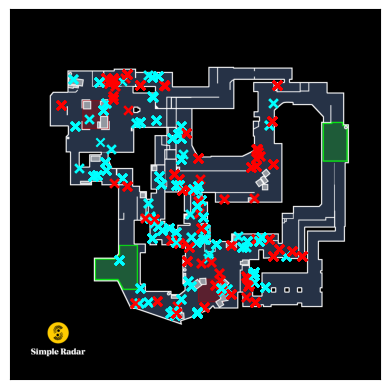

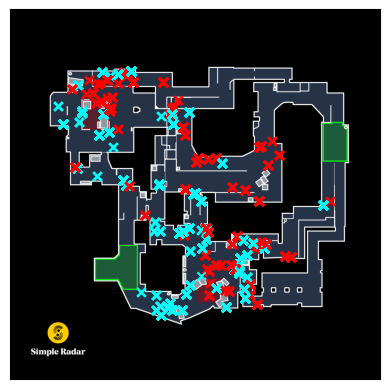

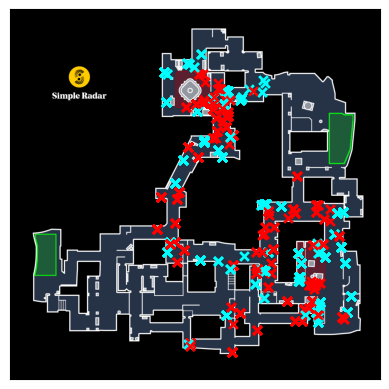

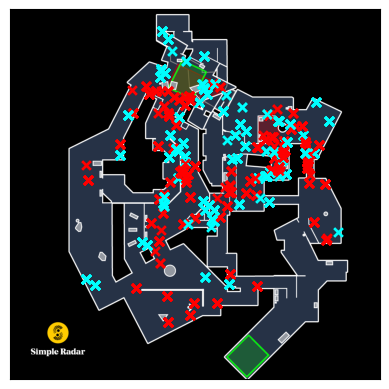

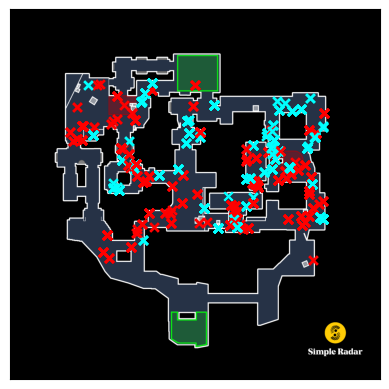

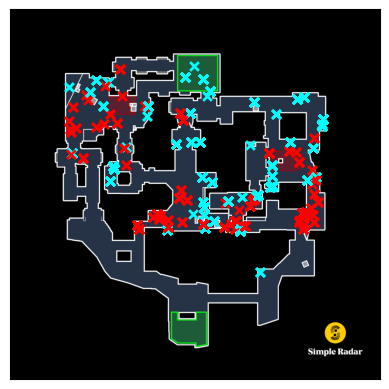

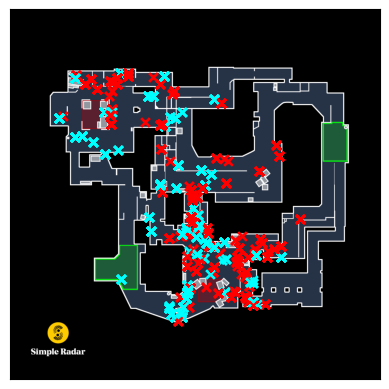

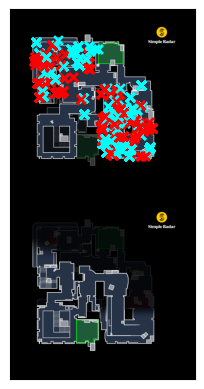

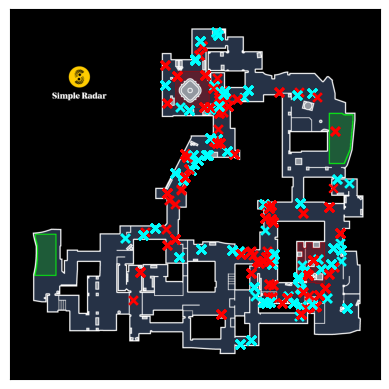

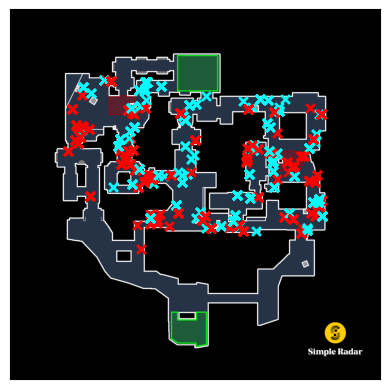

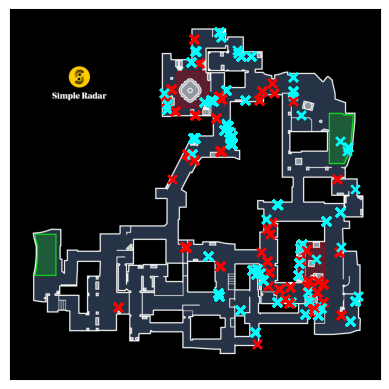

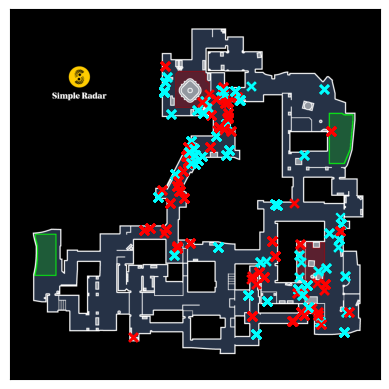

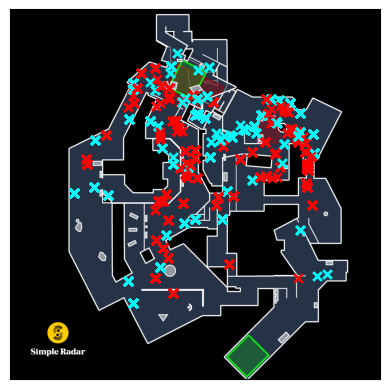

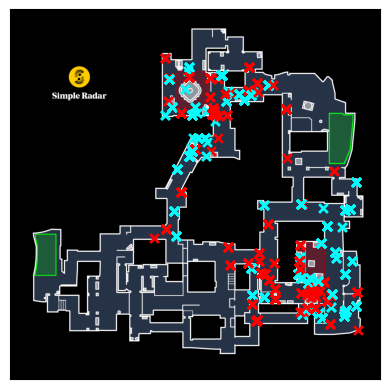

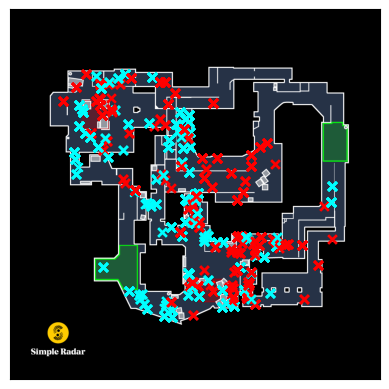

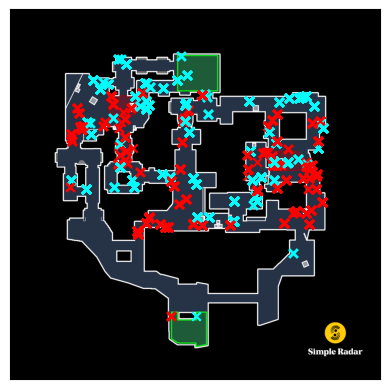

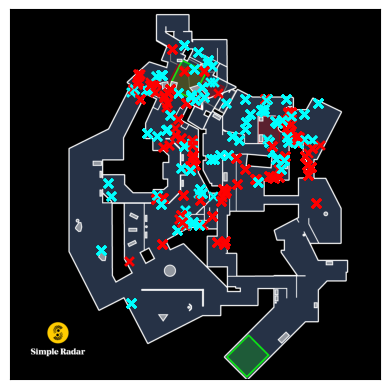

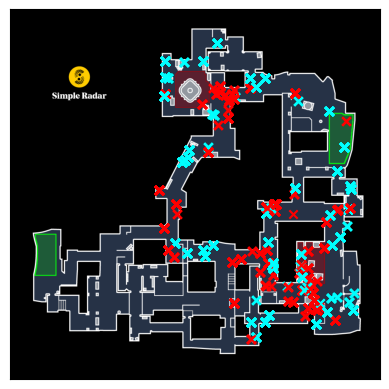

In [3]:
from alteredAwpyFunctions import *

for index, game in enumerate(games):
    plot_game_deaths_overlay_last_frame("ancient_round_"+str(index)+".gif", game["gameRounds"], map_name=game["mapName"], map_type="simpleradar", dark=False)